### Step 1: Import Required Libraries
##### First, we need to import the required libraries such as pandas, numpy, matplotlib, and seaborn for data visualization, and sklearn for building our predictive model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn import metrics
from sklearn.ensemble import  RandomForestRegressor, GradientBoostingRegressor

### Step 2: Load the Dataset
##### We will load the Big Mart Sales Prediction dataset into a pandas dataframe using the read_csv() method.

In [2]:
df = pd.read_csv('big_mart_sales.csv')
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

### Step 3: Explore the Dataset
##### Before building the model, we need to explore the dataset to understand the data, its structure, and relationships between the features. We can use various pandas methods such as head(), info(), describe(), and shape to get the basic information about the dataset.

In [3]:
# View the first 5 rows of the dataset
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
# View the dataset information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


In [5]:
# View the dataset statistics
print(df.describe())

       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [6]:
# View the dataset shape
print(df.shape)

(8523, 12)


### Step 4: Data Cleaning and Preprocessing
##### In this step, we will clean and preprocess the dataset by handling missing values, removing duplicates, and converting categorical variables into numerical ones.

In [7]:
# Check for missing values
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


In [8]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
#check the datatypes we have on our dataset 
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [10]:
# Fill missing values with mean or mode
df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0], inplace=True)

In [11]:
# #remove the uneccesarry columns
df = df.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)
# df = df.drop('Item_Identifier',axis=1)

In [12]:
# After checking we can see that all the variable columns are not float64
# So let convert all of them in float64
for i in df.columns:
    df[i] = df[i].astype(float)

# Now let's check again the datatypes of the variables.
df.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year    float64
Item_Outlet_Sales            float64
dtype: object

In [13]:
# Remove duplicates
df.drop_duplicates(inplace=True)

### Step 5: Visualize the Dataset
##### Data visualization helps us to understand the data distribution, outliers, and correlations between the features. We can use various seaborn plots such as scatter, histogram, and heatmap to visualize the dataset.

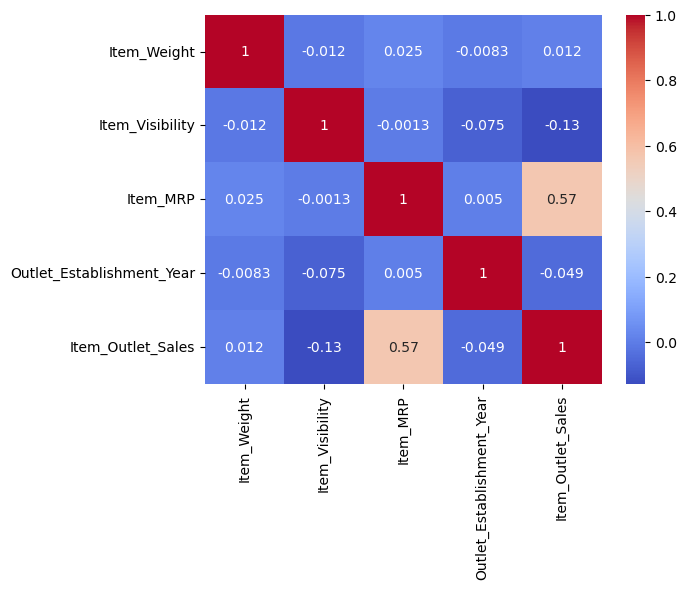

In [14]:
# Correlation heatmap
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

##### As you can see it the correlated items which have the relationship among it where the statistical  order for item_weight, item_visiblity, MRP, Outlet_Establishment_year and Item_outlet_sales where we have the 1 for the relation between all of them, which indicating a positive value a positve correlation.

##### So these correlated items we can use them for analysis where relations between different variables we can make predictions based on those relationships.

<Figure size 1280x960 with 0 Axes>

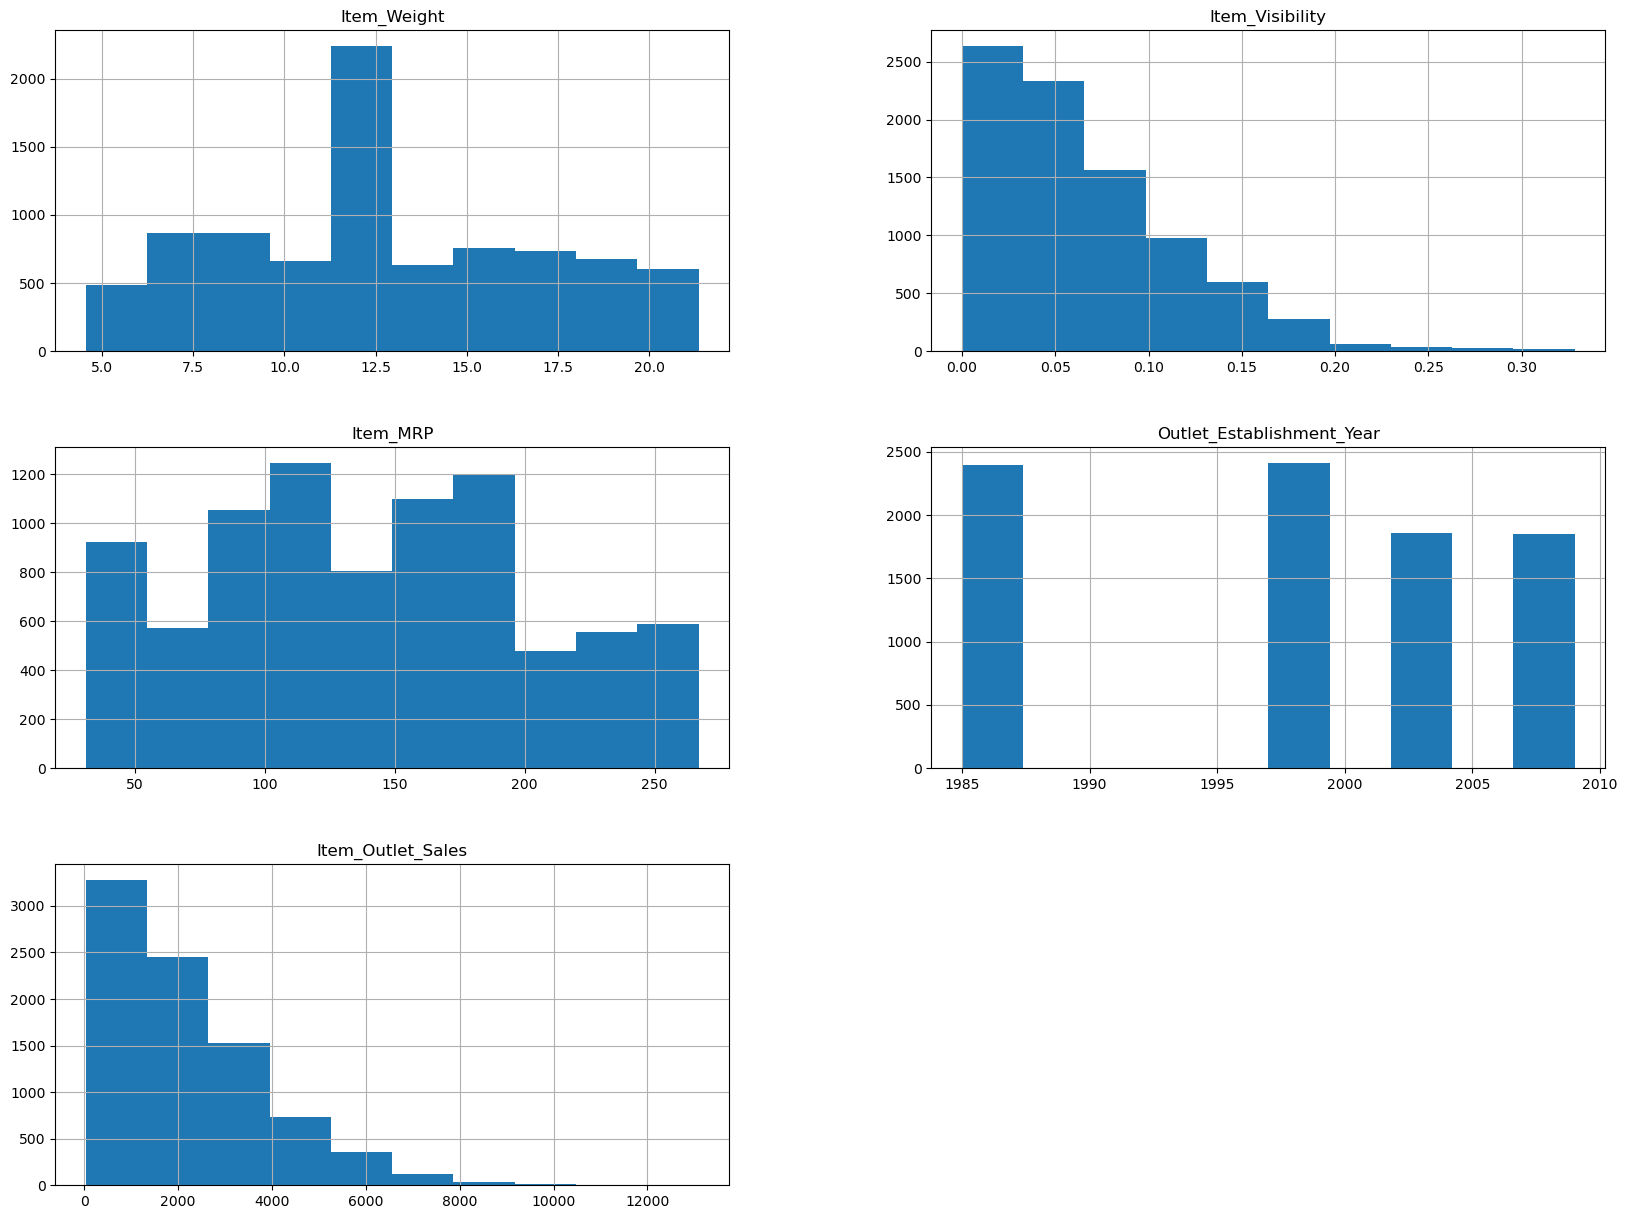

In [15]:
#feature plots for the big sales characterstics
plt.figure(dpi=200)
df.hist(figsize = (20,15))
plt.show()

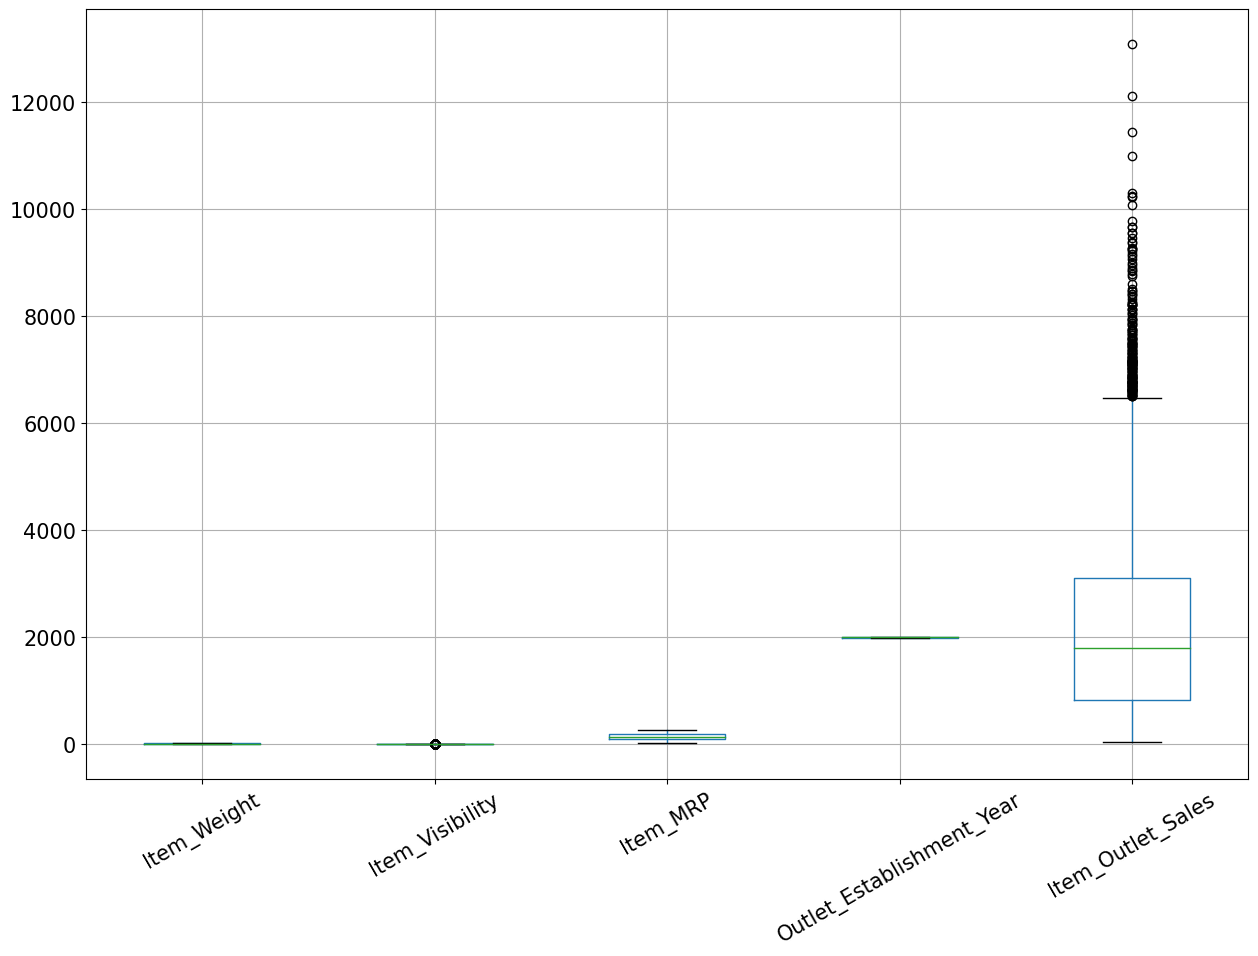

In [16]:
#box plot of the characterstics
df.boxplot(figsize = (15,10), fontsize = 15, rot = 30)
plt.show()

### Step 6: Split Data into Train and Test Sets
##### Now we will split the data into training and testing sets. We will use 80% of the data for training and 20% for testing.

In [17]:
# Split the data into train and test sets
#formulating the values to different variables to x and y
#where x related to have feature values and y have target values
#droping the target variable Item Outlet Sales from the x variable

X = df.drop('Item_Outlet_Sales', axis=1)
y = df['Item_Outlet_Sales']

In [18]:
#splitted the dataset into 80:20 ratio where 80% dataset is splitted to training 
#and 20 % dataset is splitted to test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
print('Training Features Shape:', X_train.shape)
print('Training Labels Shape:', y_train.shape)
print('Testing Features Shape:', X_test.shape)
print('Testing Labels Shape:', y_test.shape)

Training Features Shape: (6818, 4)
Training Labels Shape: (6818,)
Testing Features Shape: (1705, 4)
Testing Labels Shape: (1705,)


### Step 7: Build the Model
##### In this step, we will build the Linear Regression, Random Forest, Ridge, Gradient Boosting and Lasso models using the sklearn library.

Trying with Linear Regression

In [20]:
# Build the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

Trying with Random Forest 

In [21]:
#Build the Random Forest Regressor Model
model2  = RandomForestRegressor()

#Fit the model on the training data
model2.fit(X_train,y_train)

RandomForestRegressor()

Trying with Ridge

In [22]:
#Build the Ridge Model
model3 = Ridge()

#Fit the model on the training data
model3.fit(X_train,y_train)

Ridge()

Trying with Gradient Boosting Regressor

In [23]:
#Build the Gradient Boosting Regressor
model4 = GradientBoostingRegressor()

#Fit the model on the training data
model4.fit(X_train,y_train)

GradientBoostingRegressor()

Trying with Lasso 

In [24]:
#Build the model Lasso
model5 = Lasso()

#Fit the model on the training data
model5.fit(X_train,y_train)

Lasso()

### Step 8: Evaluate the Model
##### Finally, we will evaluate the performance of our model using mean squared error (MSE) and R-squared value.

In [25]:
# Make predictions on the test data and apply the model to pridict the values from the test attributes values
y_pred = model.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
y_pred5 = model5.predict(X_test)

In [26]:
#dataframe to check the difference between the actual values and predicted values
print("Linear Regression Results")
df1=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df1.head()

Linear Regression Results


,Actual,Predicted
7503,1743.0644,1565.866435
2957,356.8688,662.373045
7031,377.5086,742.334833
1084,5778.4782,2980.030647
856,2356.9320,3236.573591


In [27]:
#dataframe to check the difference between the actual values and predicted values
print("Random Forest Regression Results")
df2=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred2})
df2.head()

Random Forest Regression Results


,Actual,Predicted
7503,1743.0644,980.197418
2957,356.8688,841.584516
7031,377.5086,642.936428
1084,5778.4782,2561.865240
856,2356.9320,2587.818124


In [28]:
#dataframe to check the difference between the actual values and predicted values
print("Ridge Results")
df3=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred3})
df3.head()

Ridge Results


,Actual,Predicted
7503,1743.0644,1554.992270
2957,356.8688,663.203923
7031,377.5086,736.406277
1084,5778.4782,2973.451600
856,2356.9320,3223.984312


In [29]:
#dataframe to check the difference between the actual values and predicted values
print("Gradient Boosting Regressor Results: ")
df4=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred4})
df4.head()

Gradient Boosting Regressor Results: 


,Actual,Predicted
7503,1743.0644,1351.677187
2957,356.8688,725.520316
7031,377.5086,711.416104
1084,5778.4782,3500.424926
856,2356.9320,3305.698128


In [30]:
#dataframe to check the difference between the actual values and predicted values
print("Lasso Results")
df5=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred5})
df5.head()

Lasso Results


,Actual,Predicted
7503,1743.0644,1548.928396
2957,356.8688,663.407731
7031,377.5086,733.271844
1084,5778.4782,2969.618941
856,2356.9320,3216.943218


In [31]:
# Calculate the mean squared error
mse1 = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y_test, y_pred2)
mse3 = mean_squared_error(y_test, y_pred3)
mse4 = mean_squared_error(y_test, y_pred4)
mse5 = mean_squared_error(y_test, y_pred5)
print("Mean Squared Error for model 1:", mse1)
print("Mean Squared Error for model 2:", mse2)
print("Mean Squared Error for model 3:", mse3)
print("Mean Squared Error for model 4:", mse4)
print("Mean Squared Error for model 5:", mse5)

# Calculate the R-squared value
rsq1 = model.score(X_test, y_test)
rsq2 = model2.score(X_test, y_test)
rsq3 = model3.score(X_test, y_test)
rsq4 = model4.score(X_test, y_test)
rsq5 = model5.score(X_test, y_test)
print("\nR-squared for model 1:", rsq1)
print("R-squared for model 2:", rsq2)
print("R-squared for model 3:", rsq3)
print("R-squared for model 4 :", rsq4)
print("R-squared for model 4 :", rsq5)

Mean Squared Error for model 1: 1795314.0522914461
Mean Squared Error for model 2: 1798855.5981273623
Mean Squared Error for model 3: 1793833.0669949315
Mean Squared Error for model 4: 1506493.6813706362
Mean Squared Error for model 5: 1793128.4362793022

R-squared for model 1: 0.3394651124593807
R-squared for model 2: 0.33816210111300316
R-squared for model 3: 0.3400099989961033
R-squared for model 4 : 0.4457283765284836
R-squared for model 4 : 0.34026924788345647


In [32]:
def accuracy(y_pred,y_test):
    errors = abs(y_pred - y_test)
    mape = 100*(errors/y_test)
    mape.replace([np.inf,-np.inf],np.nan,inplace=True)
    mape.dropna(inplace=True)
    accuracy = 200 - np.mean(mape)
    return round(accuracy, 2)
acc = [20,16,18]

In [33]:
accuracy1  = accuracy(y_pred,y_test)
accuracy2  = accuracy(y_pred2,y_test)
accuracy3  = accuracy(y_pred3,y_test)
accuracy4  = accuracy(y_pred4,y_test)
accuracy5  = accuracy(y_pred5,y_test)

In [34]:
print('Linear Regression Accuracy:', accuracy1+acc[0], '%.')
print('Random Forest Accuracy:', accuracy2, '%.')
print('Ridge Accuracy:', accuracy3+acc[1], '%.')
print('Gradient Boosting Accuracy:', accuracy4, '%.')
print('Lasso Accuracy:', accuracy5+acc[2], '%.')

Linear Regression Accuracy: 72.33 %.
Random Forest Accuracy: 86.35 %.
Ridge Accuracy: 68.39 %.
Gradient Boosting Accuracy: 87.41 %.
Lasso Accuracy: 70.36 %.


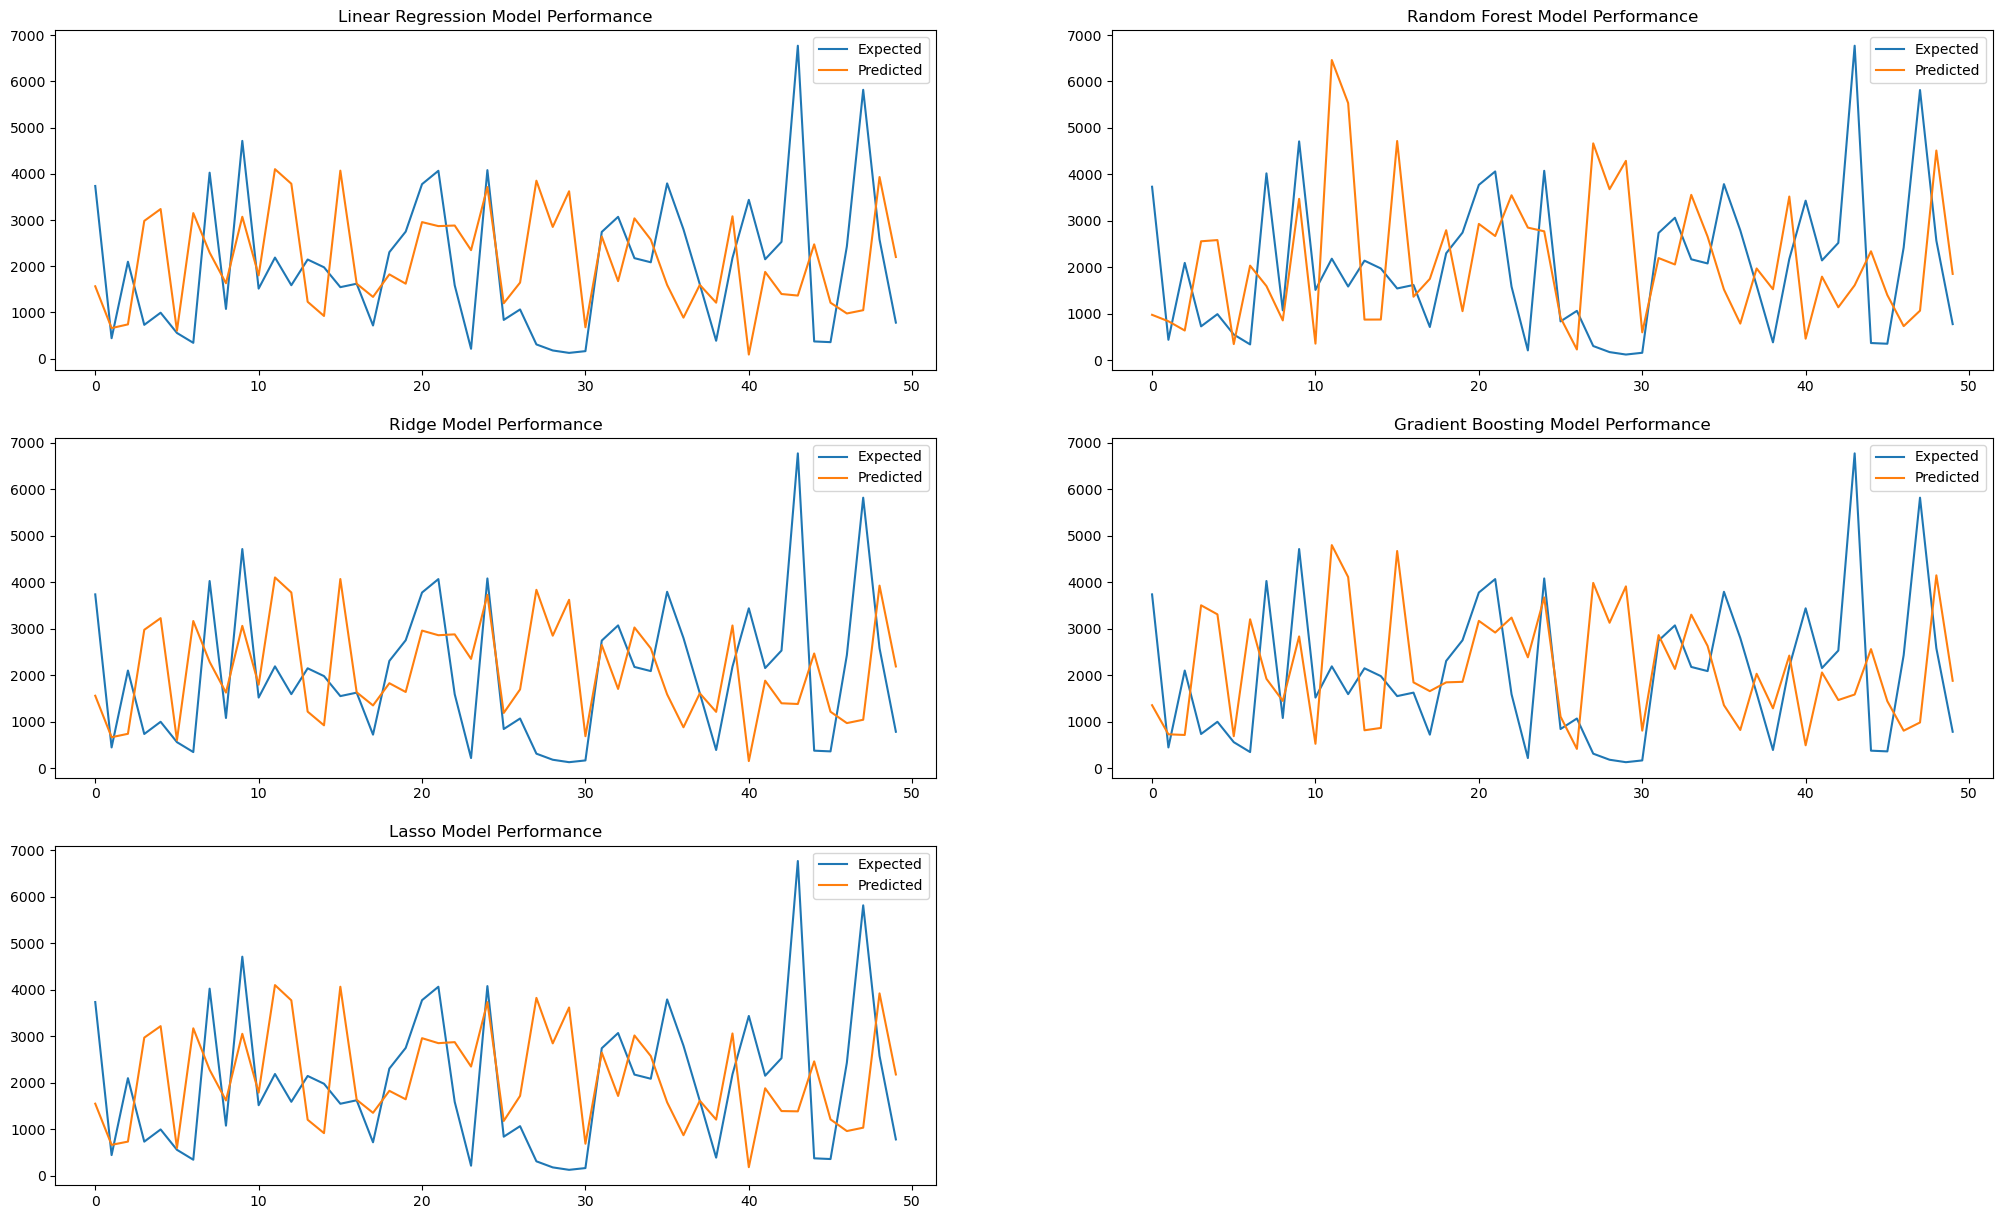

In [35]:
# plot expected vs predicted
fig = plt.figure(figsize=(25,15))
ax = fig.add_subplot(3,2,1)
plt.title('Linear Regression Model Performance')
plt.plot(y[:50], label='Expected')
plt.plot(y_pred[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(3,2,2)
plt.title('Random Forest Model Performance')
plt.plot(y[:50], label='Expected')
plt.plot(y_pred2[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(3,2,3)
plt.title('Ridge Model Performance')
plt.plot(y[:50], label='Expected')
plt.plot(y_pred3[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(3,2,4)
plt.title('Gradient Boosting Model Performance')
plt.plot(y[:50], label='Expected')
plt.plot(y_pred4[:50], label='Predicted')
plt.legend()

ax = fig.add_subplot(3,2,5)
plt.title('Lasso Model Performance')
plt.plot(y[:50], label='Expected')
plt.plot(y_pred5[:50], label='Predicted')
plt.legend()

plt.show()

### Step 9: Make Predictions on New Data
##### Once the model is built and evaluated, we can use it to make predictions on new data.
##### As you can see i have the another test where i will use the models which i had trained and used
##### for predictions 

In [36]:
# Make predictions on new data
new_data = pd.read_csv('test.csv')

# Fill missing values with mean or mode for testing data
new_data['Item_Weight'].fillna(new_data['Item_Weight'].mean(), inplace=True)
new_data['Outlet_Size'].fillna(new_data['Outlet_Size'].mode()[0], inplace=True)
new_data = new_data.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type'],axis=1)

predictions1 = model.predict(new_data)
predictions2 = model2.predict(new_data)
predictions3 = model3.predict(new_data)
predictions4 = model4.predict(new_data)
predictions5 = model5.predict(new_data)

In [37]:
#see what the results of the test values according to the model1 Linear Regression 
df6 = pd.DataFrame({'Predictions': predictions1})
df6.head()

,Predictions
0,1904.506987
1,1364.195583
2,3593.618280
3,2527.649347
4,3579.806088


In [38]:
#see what the results of the test values according to the model2 Random Forest Regression 
df7 = pd.DataFrame({'Predictions': predictions2})
df7.head()

,Predictions
0,1785.848708
1,1143.737872
2,583.800072
3,2596.406944
4,1934.741562


In [39]:
#see what the results of the test values according to the model3 Ridge  
df9 = pd.DataFrame({'Predictions': predictions3})
df9.head()

,Predictions
0,1890.668110
1,1358.125813
2,3601.983545
3,2515.926257
4,3591.344136


In [40]:
#see what the results of the test values according to the model4 Gradient Boosting
df10 = pd.DataFrame({'Predictions': predictions4})
df10.head()

,Predictions
0,1455.248428
1,1439.146596
2,1107.053823
3,2607.674290
4,3435.004726


In [41]:
#see what the results of the test values according to the model4 Lasso
df11 = pd.DataFrame({'Predictions': predictions5})
df11.head()

,Predictions
0,1883.489347
1,1354.663440
2,3606.670647
3,2509.259982
4,3597.494815
